In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc

In [3]:
df = pd.read_csv('/content/heart_statlog_cleveland_hungary_final.csv')

In [4]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [17]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

MessageError: Error: credential propagation was unsuccessful

In [5]:

df.columns = ['age','sex','chest pain type','resting bp s' ,'cholesterol','fasting blood sugar','resting ecg','max heart rate','exercise angina','oldpeak','ST slope','target']


In [6]:
df.dtypes

,0
age,int64
sex,int64
chest pain type,int64
resting bp s,int64
cholesterol,int64
fasting blood sugar,int64
resting ecg,int64
max heart rate,int64
exercise angina,int64
oldpeak,float64


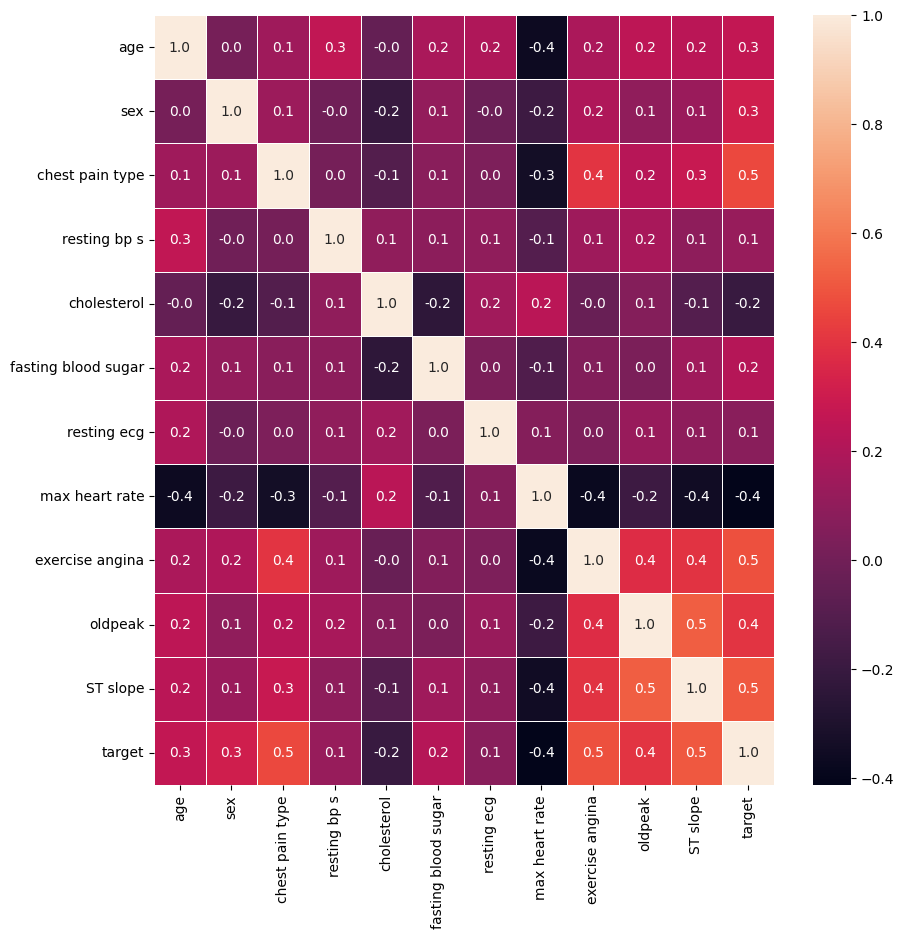

In [7]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt='.1f',ax=ax)
plt.show()

<Axes: ylabel='resting bp s'>

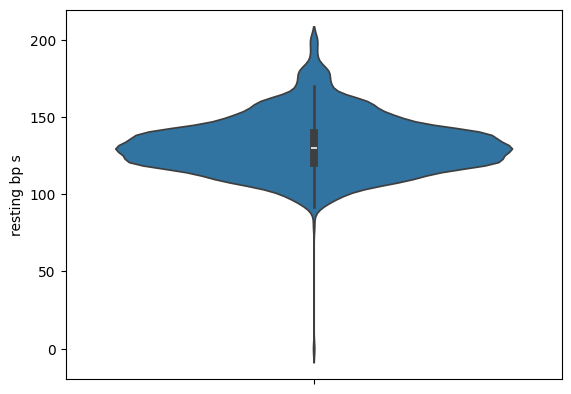

In [8]:
sns.violinplot(y='resting bp s',data=df)

<Axes: ylabel='cholesterol'>

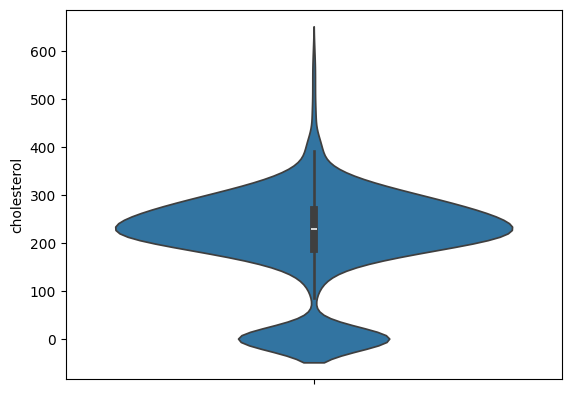

In [9]:
sns.violinplot(y='cholesterol',data=df)

In [ ]:
sns.violinplot(y='max heart rate',data=df)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), # Use axis=1 to specify that you want to drop a column
                                                    df['target'], test_size = 0.30, random_state=42)


In [11]:

model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [12]:
y_predict = model.predict(X_test)

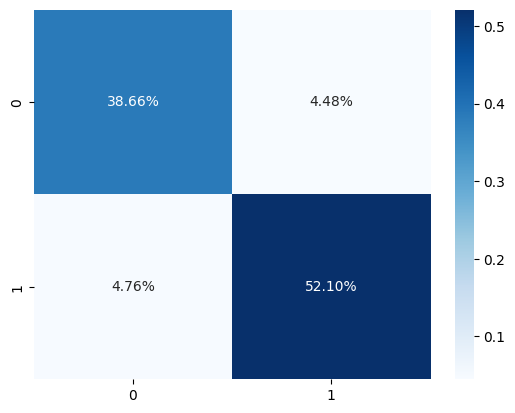

Accuracy is:  90.75630252100841


In [13]:

cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm/np.sum(cm),annot=True,fmt=".2%",cmap='Blues')
plt.show()
ac = accuracy_score(y_test,y_predict)
print('Accuracy is: ',ac*100)

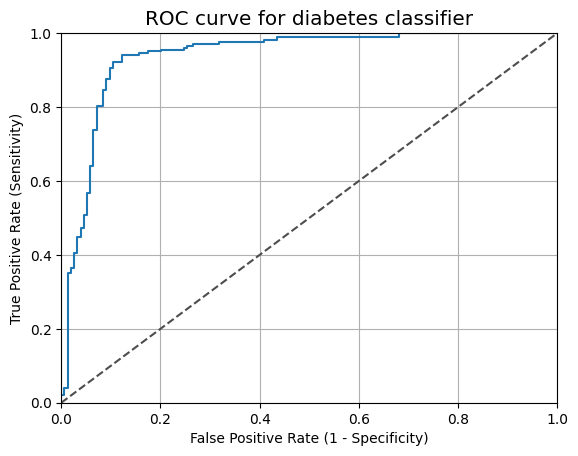

In [14]:

y_pred_quant = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)




In [15]:
auc(fpr, tpr)

np.float64(0.9379438295694453)

In [16]:

import pandas as pd
# Example patient data
# Replace the values with the actual data for the patient you want to predict
patient_data = {
    'age': 37,
    'sex': 1,  # 1 for male, 0 for female
    'chest pain type': 4,  # e.g., 1 = typical angina
    'resting bp s': 140,

    'cholesterol': 245,
    'fasting blood sugar': 207,  # 1 = true, 0 = false
       'resting ecg': 130,  # e.g., 1 = normal

    'max heart rate': 1,
    'exercise angina': 1,  # 1 = yes, 0 = no
    'oldpeak': 5,


    'ST slope': 2,  # e.g., 1 = upsloping

}

# Create a DataFrame from the patient data
patient_df = pd.DataFrame([patient_data])

# Predict using the trained model
prediction = model.predict(patient_df)

# Display the prediction
if prediction[0] == 1:
    print("The patient is predicted to have heart disease.")
else:
    print("The patient is predicted not to have heart disease.")




The patient is predicted to have heart disease.
